In [2]:
# 匯入套件
import requests, json
import matplotlib.pyplot as plt
from datetime import datetime
'''
參考頁面: 
[1] 氣象資料開放平台
https://opendata.cwa.gov.tw/index
[2] 鄉鎮天氣預報-台灣未來1週天氣預報
https://opendata.cwa.gov.tw/dataset/forecast/F-D0047-091
[3] ASK ChatGPT XD
'''
# API Key
auth_code = 'CWA-D21D3E5F-4637-467D-99F6-7BC2093562A2'

# 發送請求
res = requests.get(
    url=f'https://opendata.cwa.gov.tw/fileapi/v1/opendataapi/F-D0047-091?Authorization={auth_code}&downloadType=WEB&format=JSON'
)

# 取得 JSON 資料 (dict 格式)
obj = res.json()

# Assuming objLoc is your JSON object
# Lists to store the data

'''
need dictionary for each city/county
連江縣
金門縣
宜蘭縣
新竹縣
苗栗縣
彰化縣
南投縣
雲林縣
嘉義縣
屏東縣
臺東縣
花蓮縣
澎湖縣
基隆市
新竹市
嘉義市
臺北市
高雄市
新北市
臺中市
臺南市
桃園市
北部區域：包括臺北市、新北市、基隆市、新竹市、桃園市、新竹縣及宜蘭縣。 
中部區域：包括臺中市、苗栗縣、彰化縣、南投縣及雲林縣。 
南部區域：包括高雄市、臺南市、嘉義市、嘉義縣、屏東縣及澎湖縣。 
東部區域：包括花蓮縣及臺東縣。
'''
# 北部
tp_weather = {} # 臺北市
nt_weather = {} # 新北市
kl_weather = {} # 基隆市
hsinCi_weather = {} # 新竹市
ty_weather = {} # 桃園市
hsinCo_weather = {} # 新竹縣
yil_weather = {} # 宜蘭縣
 
# 中部
tc_weather = {} # 臺中市
ml_weather = {} # 苗栗縣
ch_weather = {} # 彰化縣
ntou_weather = {} # 南投縣
yunl_weather = {} # 雲林縣

# 南部
ks_weather = {} # 高雄市
tn_weather = {} # 臺南市
chiaCi_weather = {} # 嘉義市
chiaCo_weather = {} # 嘉義縣
pt_weather = {} # 屏東縣

# 東部
hl_weather = {} # 花蓮縣
td_weather = {} # 臺東縣

# 離島
ph_weather = {} # 澎湖縣
lj_weather = {} # 連江縣
km_weather = {} # 金門縣



# 取得 JSON 資料 (dict 格式)
obj = res.json()
with open('weather_data.json', 'w', encoding='utf-8') as f:
    json.dump(obj, f, ensure_ascii=False, indent=4)

'''
make it into a function so cleaner look
'''
# 印出每一個縣市的一週天氣
def weather(city, weather_dict):
    for objLoc in obj["cwaopendata"]["dataset"]["locations"]["location"]:
        if objLoc['locationName'] == city:
            # 輸出基本資訊
            print(f"=== 縣市名稱: {objLoc['locationName']}, latitude: {objLoc['lat']}, longitude: {objLoc['lon']} ===")
        
            # 輸出天氣資訊
            for we in objLoc['weatherElement']:
                # 選擇平均溫度來顯示資料
                if we['elementName'] == 'T':
                    print(f"{we['description']}")
                    for t in we['time']:
                        print(f"開始時間: {t['startTime']}, 結束時間: {t['endTime']}")
                        print(f"溫度: {t['elementValue']['measures']} {t['elementValue']['value']}")
                        
                        weather_dict[t['startTime']] = float(t['elementValue']['value'])

# 北部
weather('臺北市', tp_weather)
weather('新北市', nt_weather)
weather('基隆市', kl_weather)
weather('桃園市', ty_weather)
weather('新竹市', hsinCi_weather)
weather('新竹縣', hsinCo_weather)
weather('宜蘭縣', yil_weather)

=== 縣市名稱: 臺北市, latitude: 25.035095, longitude: 121.558742 ===
平均溫度
開始時間: 2024-09-17T18:00:00+08:00, 結束時間: 2024-09-18T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-18T06:00:00+08:00, 結束時間: 2024-09-18T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-18T18:00:00+08:00, 結束時間: 2024-09-19T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-19T06:00:00+08:00, 結束時間: 2024-09-19T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-19T18:00:00+08:00, 結束時間: 2024-09-20T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-20T06:00:00+08:00, 結束時間: 2024-09-20T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-20T18:00:00+08:00, 結束時間: 2024-09-21T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-21T06:00:00+08:00, 結束時間: 2024-09-21T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-21T18:00:00+08:00, 結束時間: 2024-09-22T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-22T06:00:00+08:00, 結束時間: 2024-09-22T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-22T18:00:00+08:00, 結束時間: 2024-09-23T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-23T06:00:00+08:00, 結束時間: 2024-09-23T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-23T18:0

In [41]:
# 中部
weather('臺中市', tc_weather)
weather('苗栗縣', ml_weather)
weather('彰化縣', ch_weather)
weather('南投縣', ntou_weather)
weather('雲林縣', yunl_weather)

=== 縣市名稱: 臺中市, latitude: 24.142918, longitude: 120.66295 ===
平均溫度
開始時間: 2024-09-17T18:00:00+08:00, 結束時間: 2024-09-18T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-18T06:00:00+08:00, 結束時間: 2024-09-18T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-18T18:00:00+08:00, 結束時間: 2024-09-19T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-19T06:00:00+08:00, 結束時間: 2024-09-19T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-19T18:00:00+08:00, 結束時間: 2024-09-20T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-20T06:00:00+08:00, 結束時間: 2024-09-20T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-20T18:00:00+08:00, 結束時間: 2024-09-21T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-21T06:00:00+08:00, 結束時間: 2024-09-21T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-21T18:00:00+08:00, 結束時間: 2024-09-22T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-22T06:00:00+08:00, 結束時間: 2024-09-22T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-22T18:00:00+08:00, 結束時間: 2024-09-23T06:00:00+08:00
溫度: 攝氏度 27
開始時間: 2024-09-23T06:00:00+08:00, 結束時間: 2024-09-23T18:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-23T18:00

In [45]:
# 南部
weather('高雄市', ks_weather)
weather('臺南市', tn_weather)
weather('嘉義市', chiaCi_weather)
weather('嘉義縣', chiaCo_weather)
weather('屏東縣', pt_weather)

=== 縣市名稱: 高雄市, latitude: 22.623511, longitude: 120.304085 ===
平均溫度
開始時間: 2024-09-17T18:00:00+08:00, 結束時間: 2024-09-18T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-18T06:00:00+08:00, 結束時間: 2024-09-18T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-18T18:00:00+08:00, 結束時間: 2024-09-19T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-19T06:00:00+08:00, 結束時間: 2024-09-19T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-19T18:00:00+08:00, 結束時間: 2024-09-20T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-20T06:00:00+08:00, 結束時間: 2024-09-20T18:00:00+08:00
溫度: 攝氏度 31
開始時間: 2024-09-20T18:00:00+08:00, 結束時間: 2024-09-21T06:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-21T06:00:00+08:00, 結束時間: 2024-09-21T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-21T18:00:00+08:00, 結束時間: 2024-09-22T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-22T06:00:00+08:00, 結束時間: 2024-09-22T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-22T18:00:00+08:00, 結束時間: 2024-09-23T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-23T06:00:00+08:00, 結束時間: 2024-09-23T18:00:00+08:00
溫度: 攝氏度 29
開始時間: 2024-09-23T18:0

In [49]:
# 東部
weather('花蓮縣', hl_weather)
weather('臺東縣', td_weather)

# 離島
weather('澎湖縣', ph_weather)
weather('連江縣', lj_weather)
weather('金門縣', km_weather)

=== 縣市名稱: 花蓮縣, latitude: 23.983897, longitude: 121.598641 ===
平均溫度
開始時間: 2024-09-17T18:00:00+08:00, 結束時間: 2024-09-18T06:00:00+08:00
溫度: 攝氏度 27
開始時間: 2024-09-18T06:00:00+08:00, 結束時間: 2024-09-18T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-18T18:00:00+08:00, 結束時間: 2024-09-19T06:00:00+08:00
溫度: 攝氏度 27
開始時間: 2024-09-19T06:00:00+08:00, 結束時間: 2024-09-19T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-19T18:00:00+08:00, 結束時間: 2024-09-20T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-20T06:00:00+08:00, 結束時間: 2024-09-20T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-20T18:00:00+08:00, 結束時間: 2024-09-21T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-21T06:00:00+08:00, 結束時間: 2024-09-21T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-21T18:00:00+08:00, 結束時間: 2024-09-22T06:00:00+08:00
溫度: 攝氏度 28
開始時間: 2024-09-22T06:00:00+08:00, 結束時間: 2024-09-22T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-22T18:00:00+08:00, 結束時間: 2024-09-23T06:00:00+08:00
溫度: 攝氏度 27
開始時間: 2024-09-23T06:00:00+08:00, 結束時間: 2024-09-23T18:00:00+08:00
溫度: 攝氏度 30
開始時間: 2024-09-23T18:0

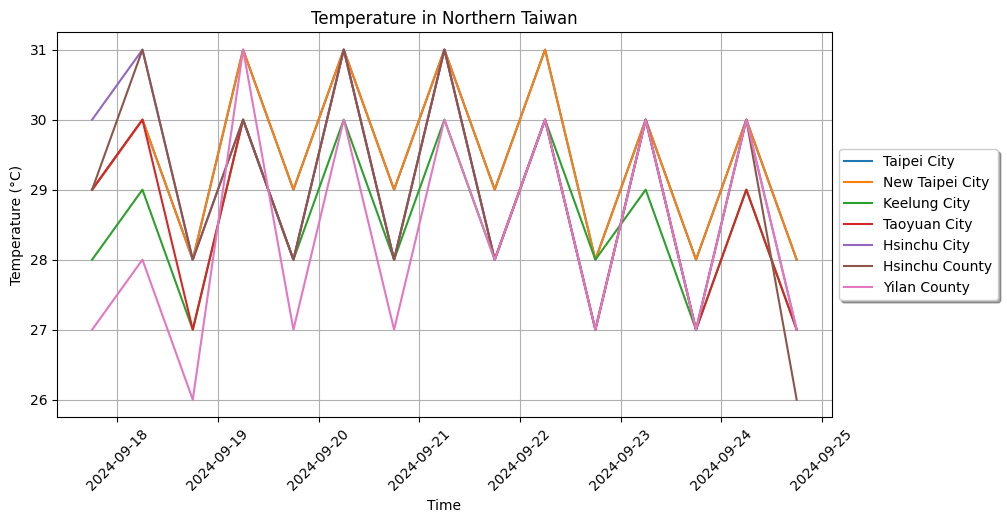

In [52]:
def plot_weather(city, weather_dict):
    # Convert the times to datetime objects
    times = [datetime.fromisoformat(time[:-6]) for time in list(weather_dict.keys())]
    
    # Plotting
    temperatures = list(weather_dict.values())

    # Plot Lines
    plt.plot(times, temperatures, label = f"{city}")

plt.figure(figsize=(10, 5))

# 北部
plot_weather('Taipei City', tp_weather)
plot_weather('New Taipei City', nt_weather)
plot_weather('Keelung City', kl_weather)
plot_weather('Taoyuan City', ty_weather)
plot_weather('Hsinchu City', hsinCi_weather)
plot_weather('Hsinchu County', hsinCo_weather)
plot_weather('Yilan County', yil_weather)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Northern Taiwan')
plt.xticks(rotation=45)  # Rotate time labels for better readability
plt.grid(True)

# Display the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.show()


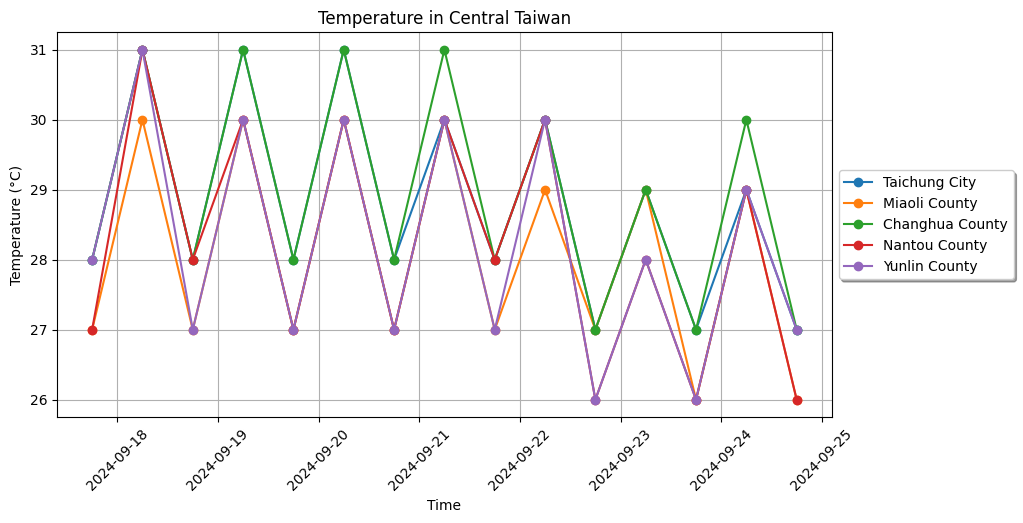

In [42]:
plt.figure(figsize=(10, 5))

# 中部
plot_weather('Taichung City', tc_weather)
plot_weather('Miaoli County', ml_weather)
plot_weather('Changhua County', ch_weather)
plot_weather('Nantou County', ntou_weather)
plot_weather('Yunlin County', yunl_weather)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Central Taiwan')
plt.xticks(rotation=45)  # Rotate time labels for better readability
plt.grid(True)

# Display the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.show()

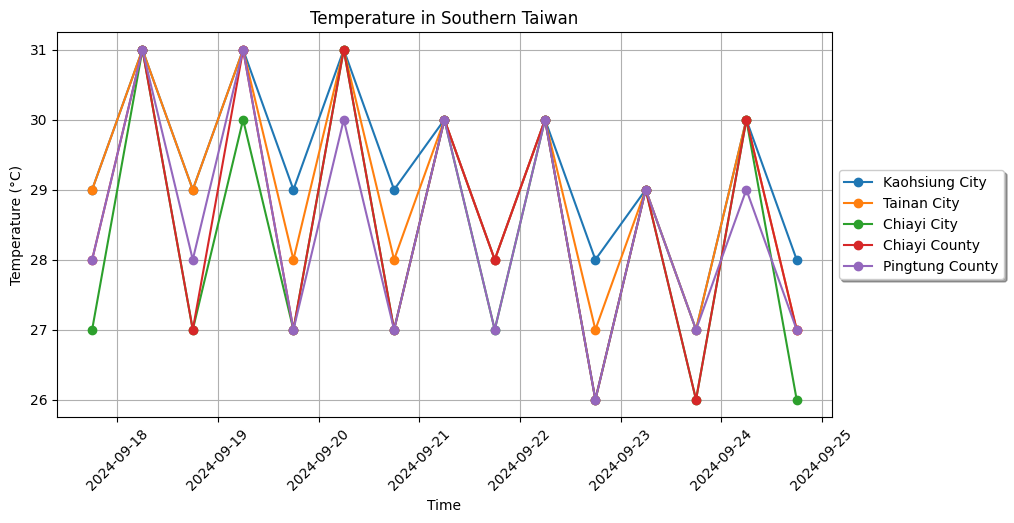

In [47]:
plt.figure(figsize=(10, 5))

# 南部
plot_weather('Kaohsiung City', ks_weather)
plot_weather('Tainan City', tn_weather)
plot_weather('Chiayi City', chiaCi_weather)
plot_weather('Chiayi County', chiaCo_weather)
plot_weather('Pingtung County', pt_weather)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Southern Taiwan')
plt.xticks(rotation=45)  # Rotate time labels for better readability
plt.grid(True)

# Display the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.show()

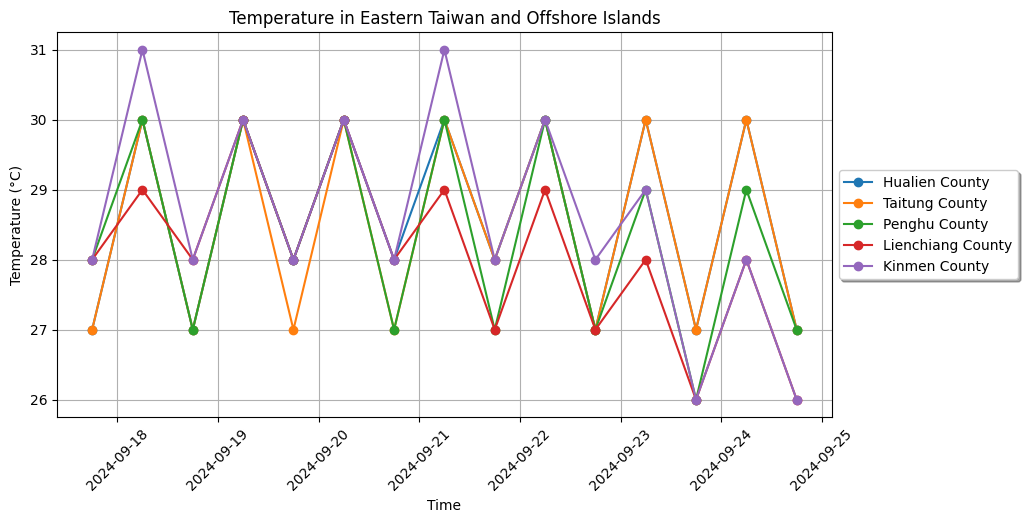

In [51]:
plt.figure(figsize=(10, 5))

# 東部
plot_weather('Hualien County', hl_weather)
plot_weather('Taitung County', td_weather)

# 離島
plot_weather('Penghu County', ph_weather)
plot_weather('Lienchiang County', lj_weather)
plot_weather('Kinmen County', km_weather)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Eastern Taiwan and Offshore Islands')
plt.xticks(rotation=45)  # Rotate time labels for better readability
plt.grid(True)

# Display the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.show()